# Analiza Głównych Składowych (PCA)

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [81]:
dataset = pd.read_csv('wine.csv')
df = pd.DataFrame(dataset)
df.head(6)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


In [82]:
df_sc = StandardScaler().fit_transform(df)
pd.DataFrame(df_sc, columns=df.columns).head(6)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039,-1.213944


In [83]:
X = df.iloc[:, 0:14].values
Y = df.iloc[:, -1].values

In [84]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(df_sc)

print('Shape before PCA: ', df_sc.shape)
print('Shape after PCA: ', pca_features.shape)

Shape before PCA:  (178, 14)
Shape after PCA:  (178, 3)


In [85]:
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2', 'PC3'])
pca_df

,PC1,PC2,PC3
0,-3.522934,1.453098,-0.164795
1,-2.528858,-0.330019,-2.026707
2,-2.785029,1.036936,0.983238
3,-3.922588,2.768210,-0.174968
4,-1.407511,0.867773,2.025829
...,...,...,...
173,3.627996,2.206617,-0.343668
174,2.942729,1.752263,0.207480
175,3.027272,2.756040,-0.940803
176,2.755222,2.293784,-0.550474


In [86]:
explained_variance = pca.explained_variance_
print(f'Explained Variance Ratios: {explained_variance}')

Explained Variance Ratios: [5.56722458 2.51118402 1.45424413]


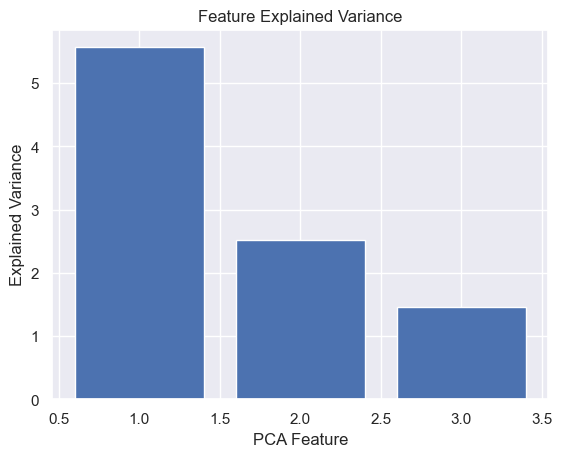

In [87]:
sns.set()

pca = PCA(n_components=3)
pca.fit_transform(df_sc)

plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('PCA Feature')
plt.ylabel('Explained Variance')
plt.title('Feature Explained Variance')
plt.show()

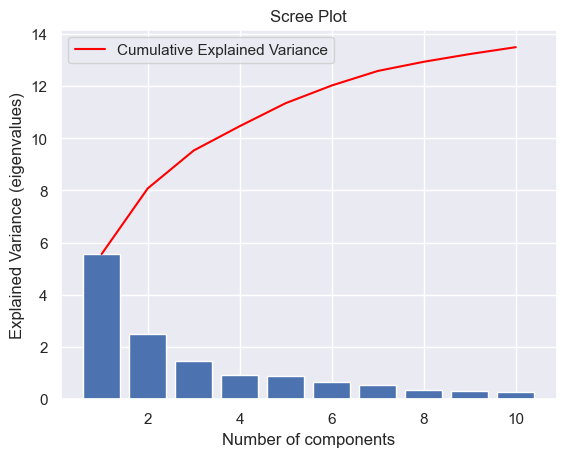

In [88]:
pca = PCA(n_components=10)
pca.fit_transform(df_sc)
explained_variance = pca.explained_variance_

plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), c='red', label='Cumulative Explained Variance')
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance (eigenvalues)')
plt.title('Scree Plot')
plt.show()

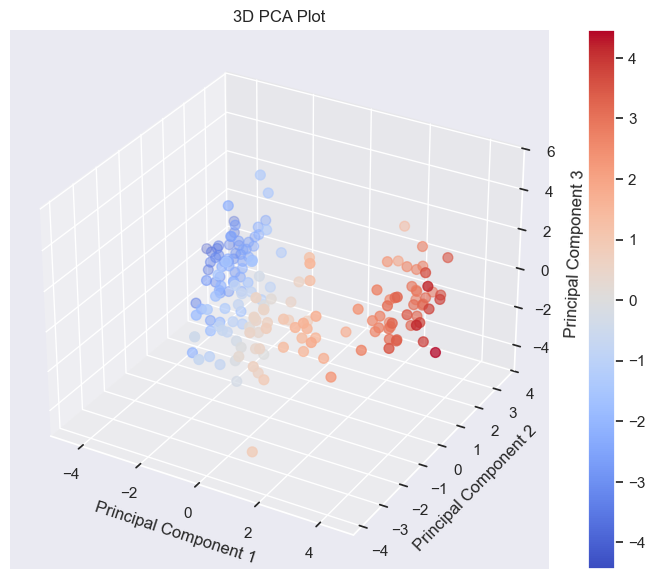

In [89]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['PC1'], cmap='coolwarm', s=50)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Plot')

plt.colorbar(scatter)
plt.show()

In [90]:
loadings = pca.components_
n_features = pca.n_features_in_
feature_names = ['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline', 'Wine']

pc_list = [f'PC{i}' for i in list(range(1, n_features - 1))]
pc_loadings = dict(zip(pc_list, loadings))

loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
feature_names,,,,,,,,,,
Alcohol,-0.136325,0.484161,-0.207401,-0.081918,-0.250894,0.135171,-0.092699,0.421544,-0.450191,-0.311280
Malic.acid,0.222676,0.223591,0.088796,0.469888,-0.188600,0.598419,0.374370,0.087576,-0.006026,0.325924
Ash,-0.002258,0.315856,0.626102,-0.249841,-0.093524,0.108000,-0.167089,-0.172080,0.262494,0.124523
Acl,0.224298,-0.011616,0.611990,0.071993,0.046567,-0.088112,-0.268725,0.413249,-0.118633,-0.157168
Mg,-0.124630,0.300551,0.130985,-0.163214,0.778330,0.144838,0.329580,-0.148812,-0.252536,-0.127734
Phenols,-0.359264,0.067120,0.146508,0.190985,-0.144666,-0.148097,-0.037898,-0.363439,-0.406374,0.307723
Flavanoids,-0.390712,-0.001313,0.150963,0.144617,-0.112006,-0.062473,-0.067732,-0.175405,-0.090919,0.140440
Nonflavanoid.phenols,0.267001,0.026989,0.169976,-0.328013,-0.432579,-0.258686,0.611112,-0.230751,-0.159123,-0.240543
Proanth,-0.279063,0.041223,0.149880,0.462758,0.091588,-0.466278,0.422923,0.343739,0.265787,-0.108696


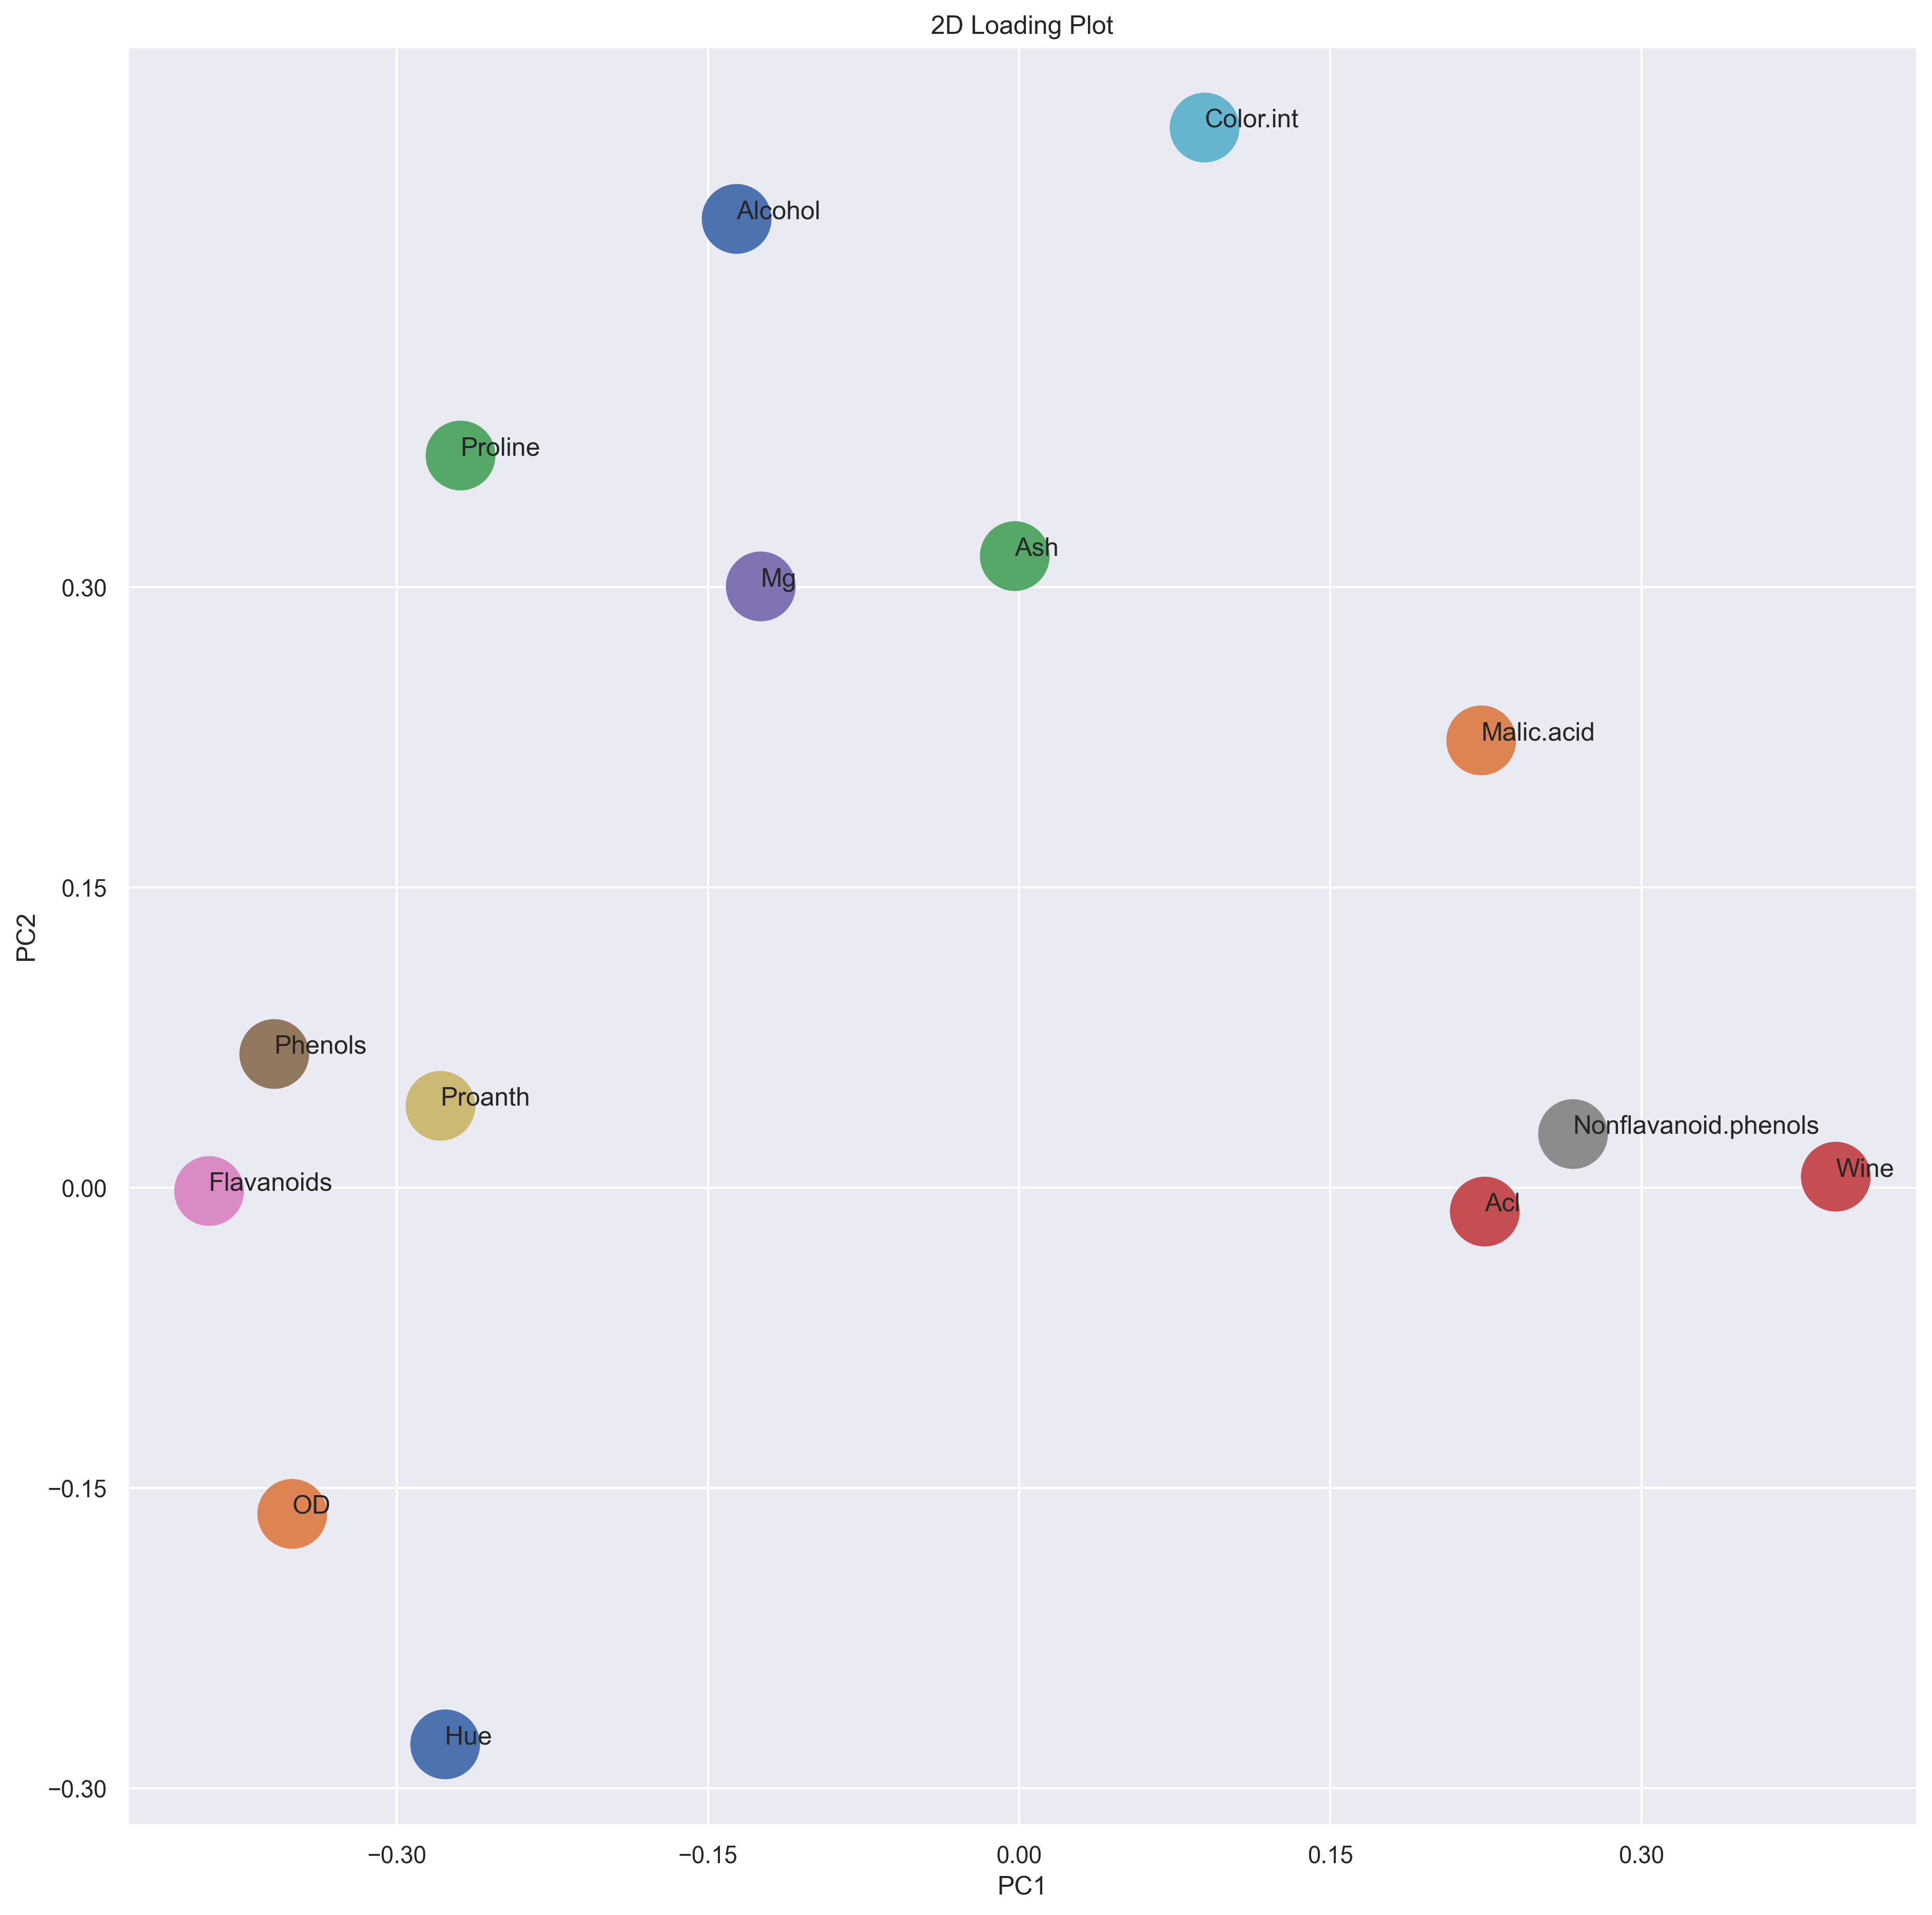

In [91]:
from matplotlib.pyplot import figure

figure(figsize=(15, 15), dpi=300)

xs = loadings[0]
ys = loadings[1]

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=1000)
    plt.text(xs[i], ys[i], varnames)

xticks = np.linspace(-0.3, 0.3, num=5)
yticks = np.linspace(-0.3, 0.3, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Loading Plot')
plt.show()

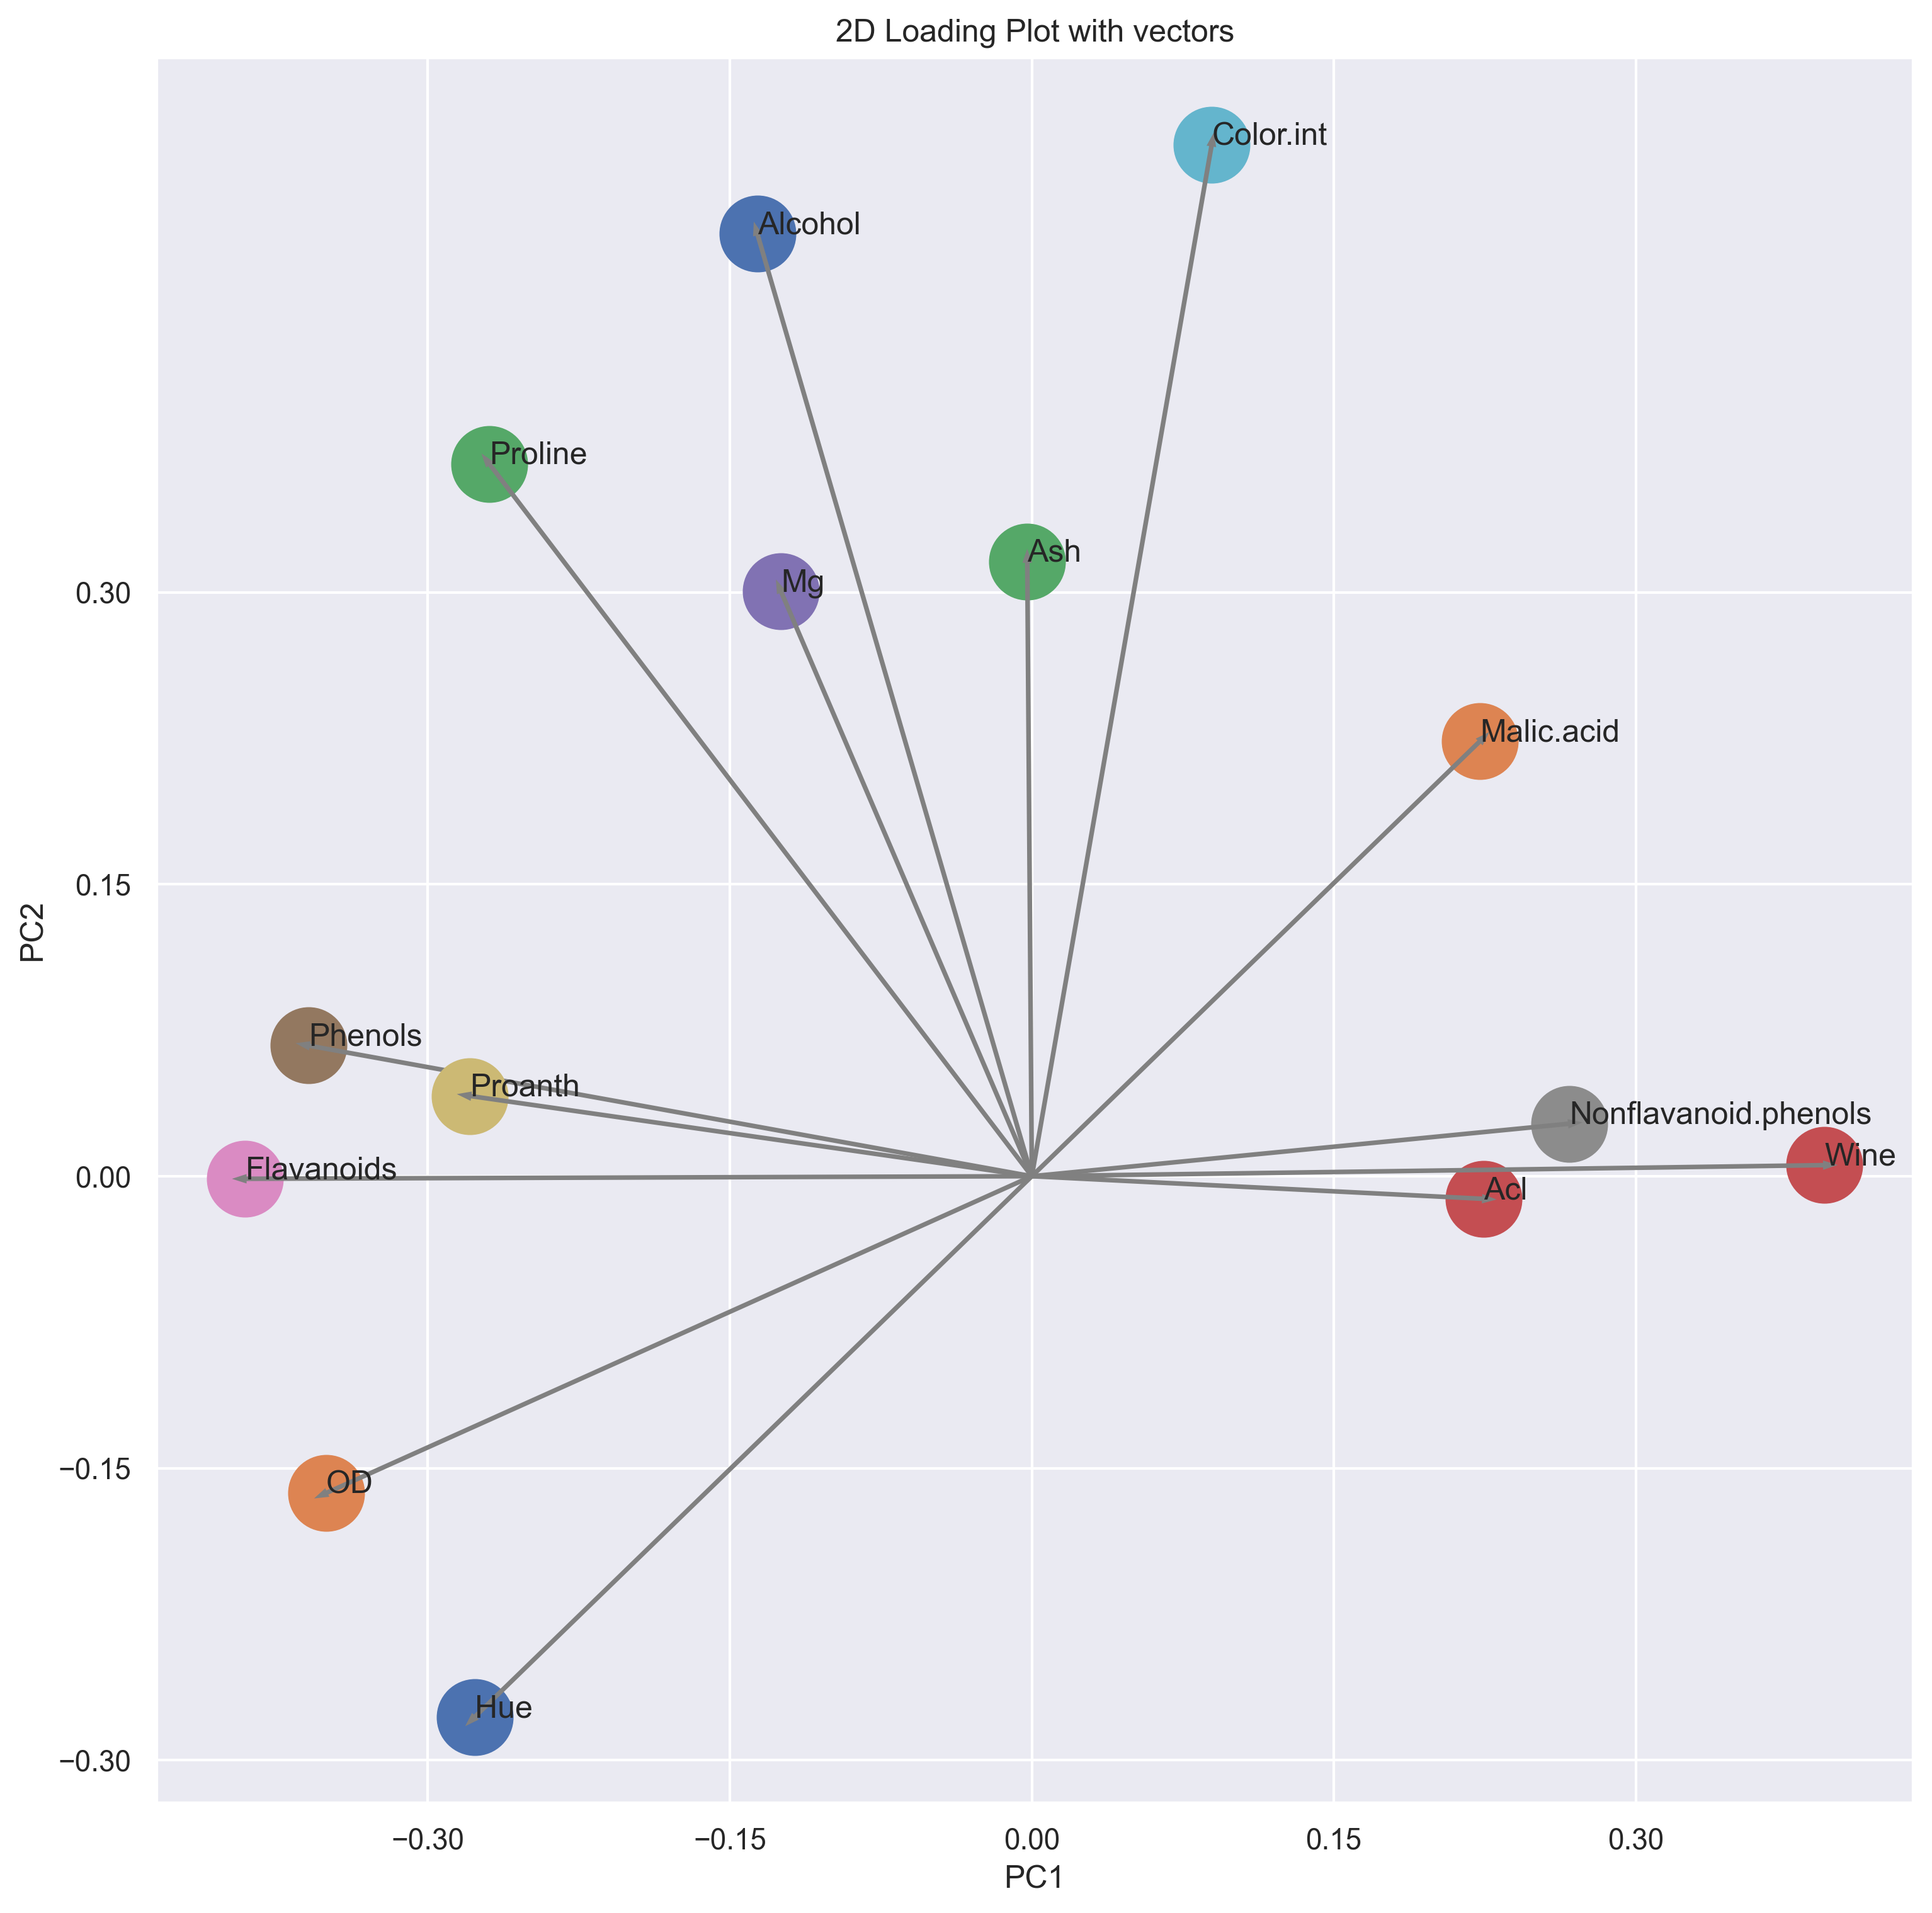

In [92]:
figure(figsize=(12, 12), dpi=300)

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=800)
    plt.arrow(
        0, 0,
        xs[i],
        ys[i],
        color='grey',
        linewidth=None,
        head_width=None,
    )
    plt.text(xs[i], ys[i], varnames)

plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.title('2D Loading Plot with vectors')
plt.show()

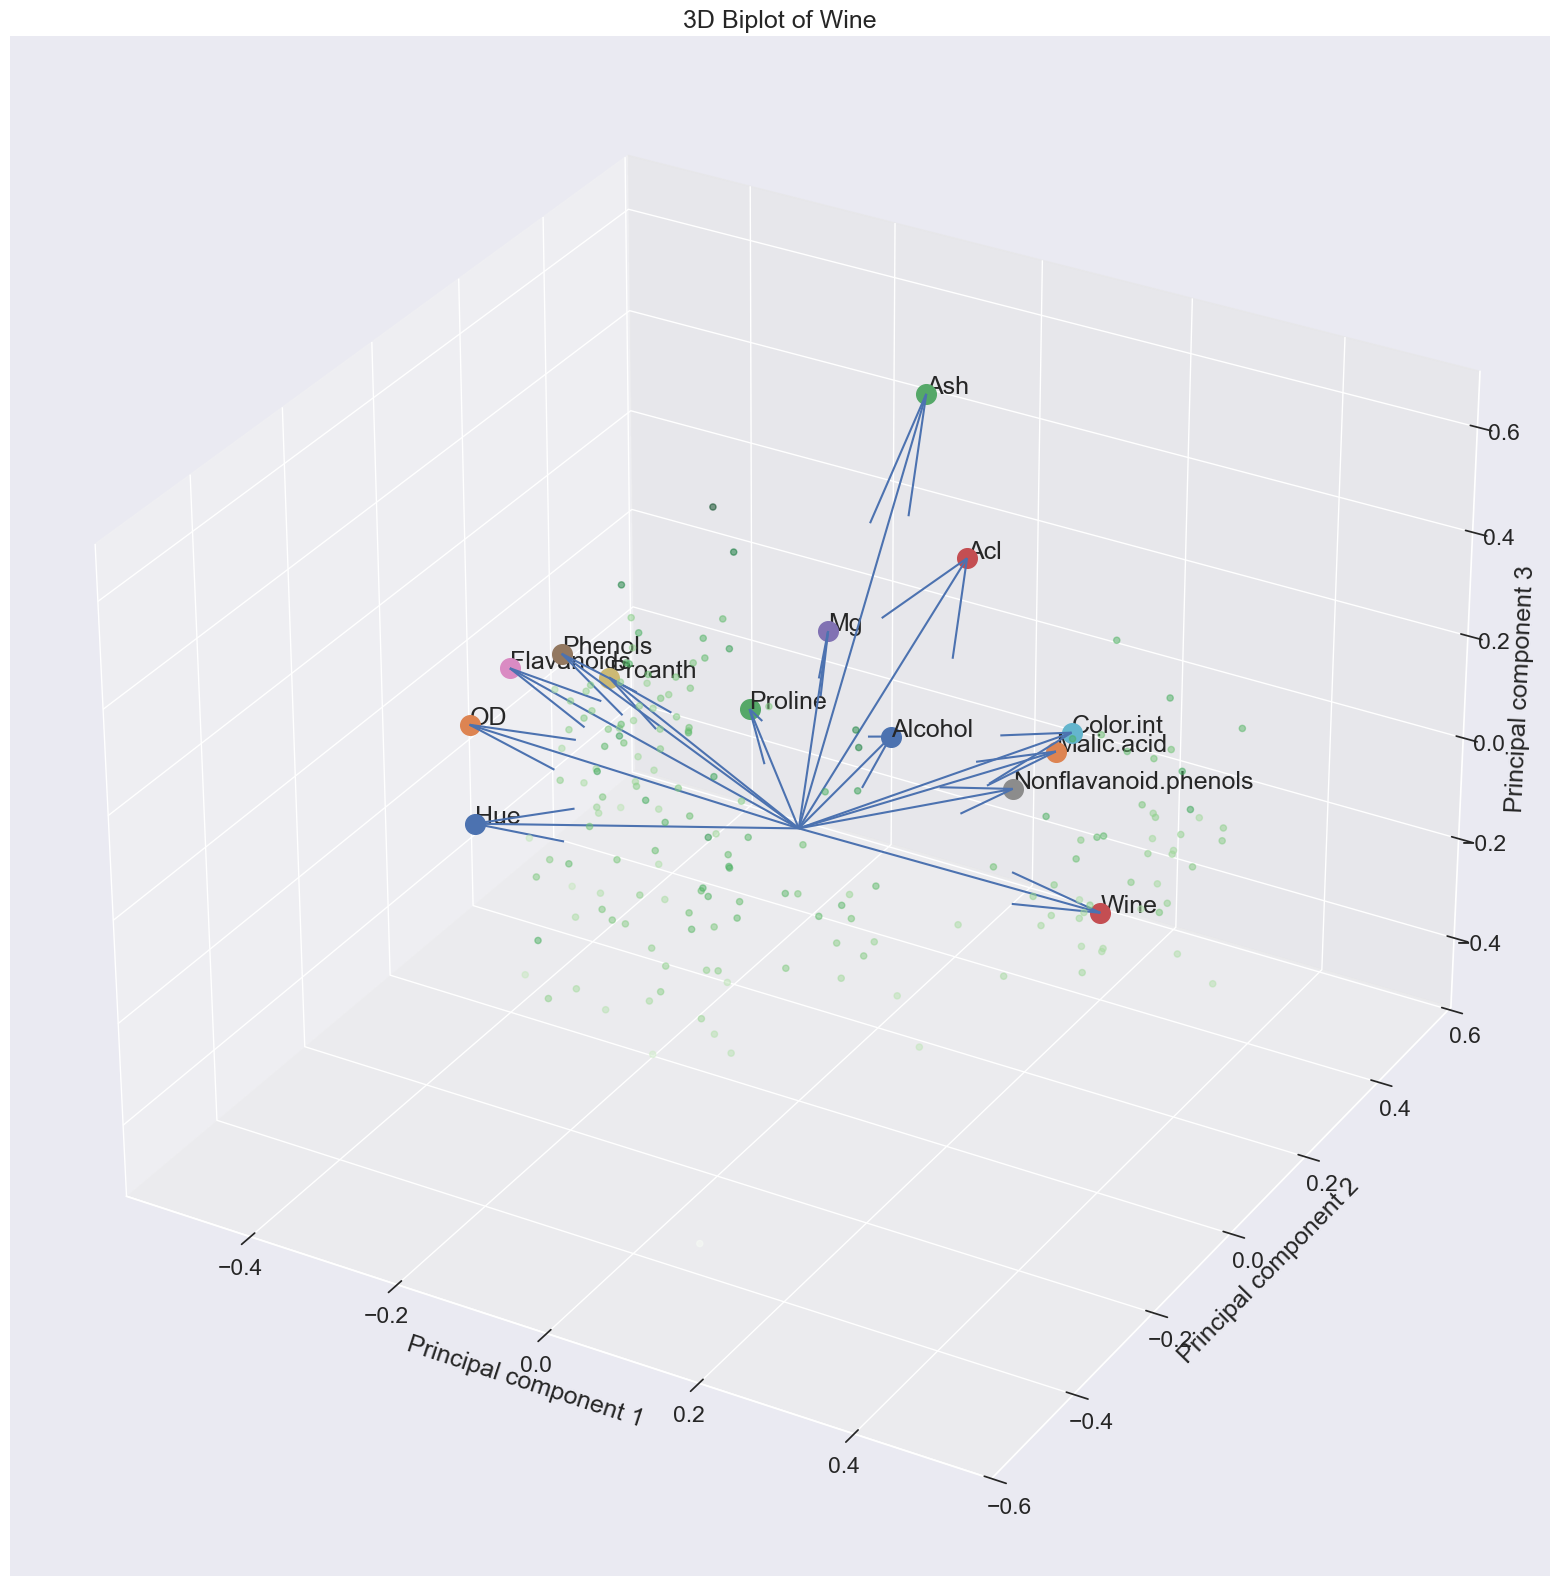

In [93]:
sns.set(font_scale=1.5)

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
pca_features = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2', 'PC3'])

target_names = {
    0: 'Toxicity Class 1',
    1: 'Toxicity Class 2',
    2: 'Toxicity Class 3'
}

pca_df['target'] = Y
pca_df['target'] = pca_df['target'].map(target_names)

pca_df_scaled = pca_df.copy()

scaler_df = pca_df[['PC1', 'PC2', 'PC3']]
scaler = 1 / (scaler_df.max() - scaler_df.min())

for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

xdata = pca_df_scaled['PC1']
ydata = pca_df_scaled['PC2']
zdata = pca_df_scaled['PC3']

ax.scatter3D(
    xdata,
    ydata,
    zdata,
    c=zdata,
    cmap='Greens',
    alpha=0.5,
)

loadings = pca.components_
xs = loadings[0]
ys = loadings[1]
zs = loadings[2]

for i, varnames in enumerate(feature_names):
    ax.scatter(xs[i], ys[i], zs[i], s=200)
    ax.text(xs[i], ys[i], zs[i], varnames)

x_arr = np.zeros(len(loadings[0]))
y_arr = z_arr = x_arr
ax.quiver(x_arr, y_arr, z_arr, xs, ys, zs)

plt.title('3D Biplot of Wine')

ax.set_xlabel('Principal component 1', rotation=150)
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3', rotation=60)

plt.show()